In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt
import cv2
import os
import pandas
import numpy
import matplotlib.pyplot as plt
import cv2
import os
import glob


chosen_strip_numbers = [101, 106, 134, 135, 161, 176, 187, 229, 232]
df = pandas.read_csv('rois_metadata_bignine.csv')
df.head()
print(len(df))

# Project Overview


<img src="images/pld3280-fig-0001-m.jpg" width="800" height="600">

## Part 1. Thresholding the image strips

Load the custom strips into the notebook and threshold them to get the binary images.

In [ ]:
def load_gray_image(image_path):
    print(f"Loading image from {image_path}")
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def equalize_image(image, clip_low=100, clip_high=255):
    equalized = cv2.equalizeHist(image)
    equalized = numpy.clip(equalized, clip_low, clip_high)
    return equalized

def get_image_metadata(image_path):
    # get the image name
    image_name = os.path.basename(image_path)
    # get the metadata for that image
    image_metadata = metadata[metadata["strip_filename"] == image_name]
    return image_metadata

In [ ]:
# get a list of all images
roi_metadata_path = "rois_metadata_bignine.csv"
image_dir = "rois/"
# load the df and print the first few rows
metadata = pandas.read_csv(roi_metadata_path)
print(f"Metadata contains {len(metadata)} images")
print(metadata.head())

# test out a load of the image 0
raw_image = load_gray_image(image_dir + metadata['strip_filename'][0])
plt.imshow(raw_image, cmap='gray')

# take the column strip_filname as a list
strip_filenames = metadata['strip_filename'].tolist()
print(strip_filenames)


In [ ]:
images = [image_dir + strip_filename for strip_filename in strip_filenames]
print(f"Found {len(images)} images")

# filter the images to only include the chosen strip numbers
image_strip_numbers = [int(os.path.basename(image).split("_")[1].strip(".png")) for image in images]
print(f"Found strip numbers: {image_strip_numbers}")

# filter the images to only include the chosen strip numbers
images = [image for image, strip_number in zip(images, image_strip_numbers) if strip_number in chosen_strip_numbers]


print(f"Found {len(images)} images after filtering: {images}")
# load the metadata
metadata = pandas.read_csv(roi_metadata_path)

# print the size of the metadata
print(f"Metadata contains {len(metadata)} images")

# print the image metadata for the first image
print(f"Image 0 metadata:")
print(get_image_metadata(images[0]))


meta_df = {"images": images,
           "clip_low": 75, 
           "clip_high": 255, 
           "min_area": 100, 
           "max_area": 1e100, 
           "k0": 2, # kernel dimensions y
           "k1": 5, # kernel dimensions x
           "opening_iterations": 1, 
           "closing_iterations": 3, 
           "threshold_type": "otsu",
           "th_min_value": 0,
            "th_max_value": 255,
           "th_block_size": 15,
           "th_constant": 2,}

print(f"Images filtered to {len(images)} images")

for item in meta_df:
    print(item, meta_df[item])

## Display our custom strips

In [ ]:
# plot all of the images in a grid
plt.figure(figsize=(9, 9))
plt.suptitle("raw image strips")
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = load_gray_image(images[i])
    plt.imshow(image, cmap="gray")
    plt.axis("off")

## Display all of the strips, with balanced and clipped scale


In [ ]:
# plot all of the images in a grid
plt.figure(figsize=(9, 9))
plt.suptitle("clipped image strips")
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = load_gray_image(images[i])
    image = equalize_image(image, clip_low=0, clip_high=130)
    plt.imshow(image, cmap="gray")
    plt.axis("off")

## Threshold the image using the Otsu method

The Otus method is a simple and effective way to threshold an image. It calculates the threshold value based on the histogram of the image. The threshold value is the value that minimizes the intra-class variance of the two classes.

In [ ]:
# threshold the image using a smart thresholding technique

clip_low, clip_high = 0, 130

def threshold_image(image, threshold_type=cv2.THRESH_BINARY, block_size=15, constant=2):
    _, thresholded = cv2.threshold(image, 0, 255, threshold_type + cv2.THRESH_OTSU)
    return thresholded

image = load_gray_image(images[0])
equalized = equalize_image(image, clip_low=clip_low, clip_high=clip_high)
thresholded = threshold_image(equalized, threshold_type=cv2.THRESH_BINARY, block_size=15, constant=2)

# plot the thresholded image
plt.figure(figsize=(5, 5))
plt.imshow(thresholded, cmap="gray")
plt.axis("off")
plt.title("Otsu Thresholded Image")

## Cleaning the strips
Our strips are not perfect, so we need to clean them up a bit. We will use morphological operations to remove small noise and fill in small holes.

The main imperfections seem to be in the non-lumen areas. In the non-lumen (darker) areas, we have some small white spots that we need to remove. We can do this by using a morphological opening operation. This operation will remove small white spots in the image.

## Inverted, cleaned, and thresholded strips

Metadata contains 9 images
   strip                                           filename  box_size     x  \
0    101  ./raw_images/2023-7-26_Wild Type_500uE 1 hour_...       200  1264   
1    106  ./raw_images/2023-9-4_Wild Type_Dark Adapted_1...       200   900   
2    134  ./raw_images/2023-9-4_Wild Type_Dark Adapted_3...       200   740   
3    135  ./raw_images/2023-9-4_Wild Type_Dark Adapted_3...       200   504   
4    161  ./raw_images/2023-2-14_Wild Type_Dark Adapted_...       200  1564   

      y strip_filename  rotation_angle   x1  y1   x2   y2  
0  1220  strip_101.png      -34.045937  121  31  178  111  
1   660  strip_106.png      -17.543258   55  48  155  177  
2   540  strip_134.png       38.204056   92  77  157  151  
3   676  strip_135.png       37.568592  101  72  165  148  
4   340  strip_161.png      -36.869898   68  20  111  133  
Loading image from rois/strip_101.png
Loading image from rois/strip_101.png
Image 0 has 2579 pixels
Saving image to d:\repos\gapfinder_ima

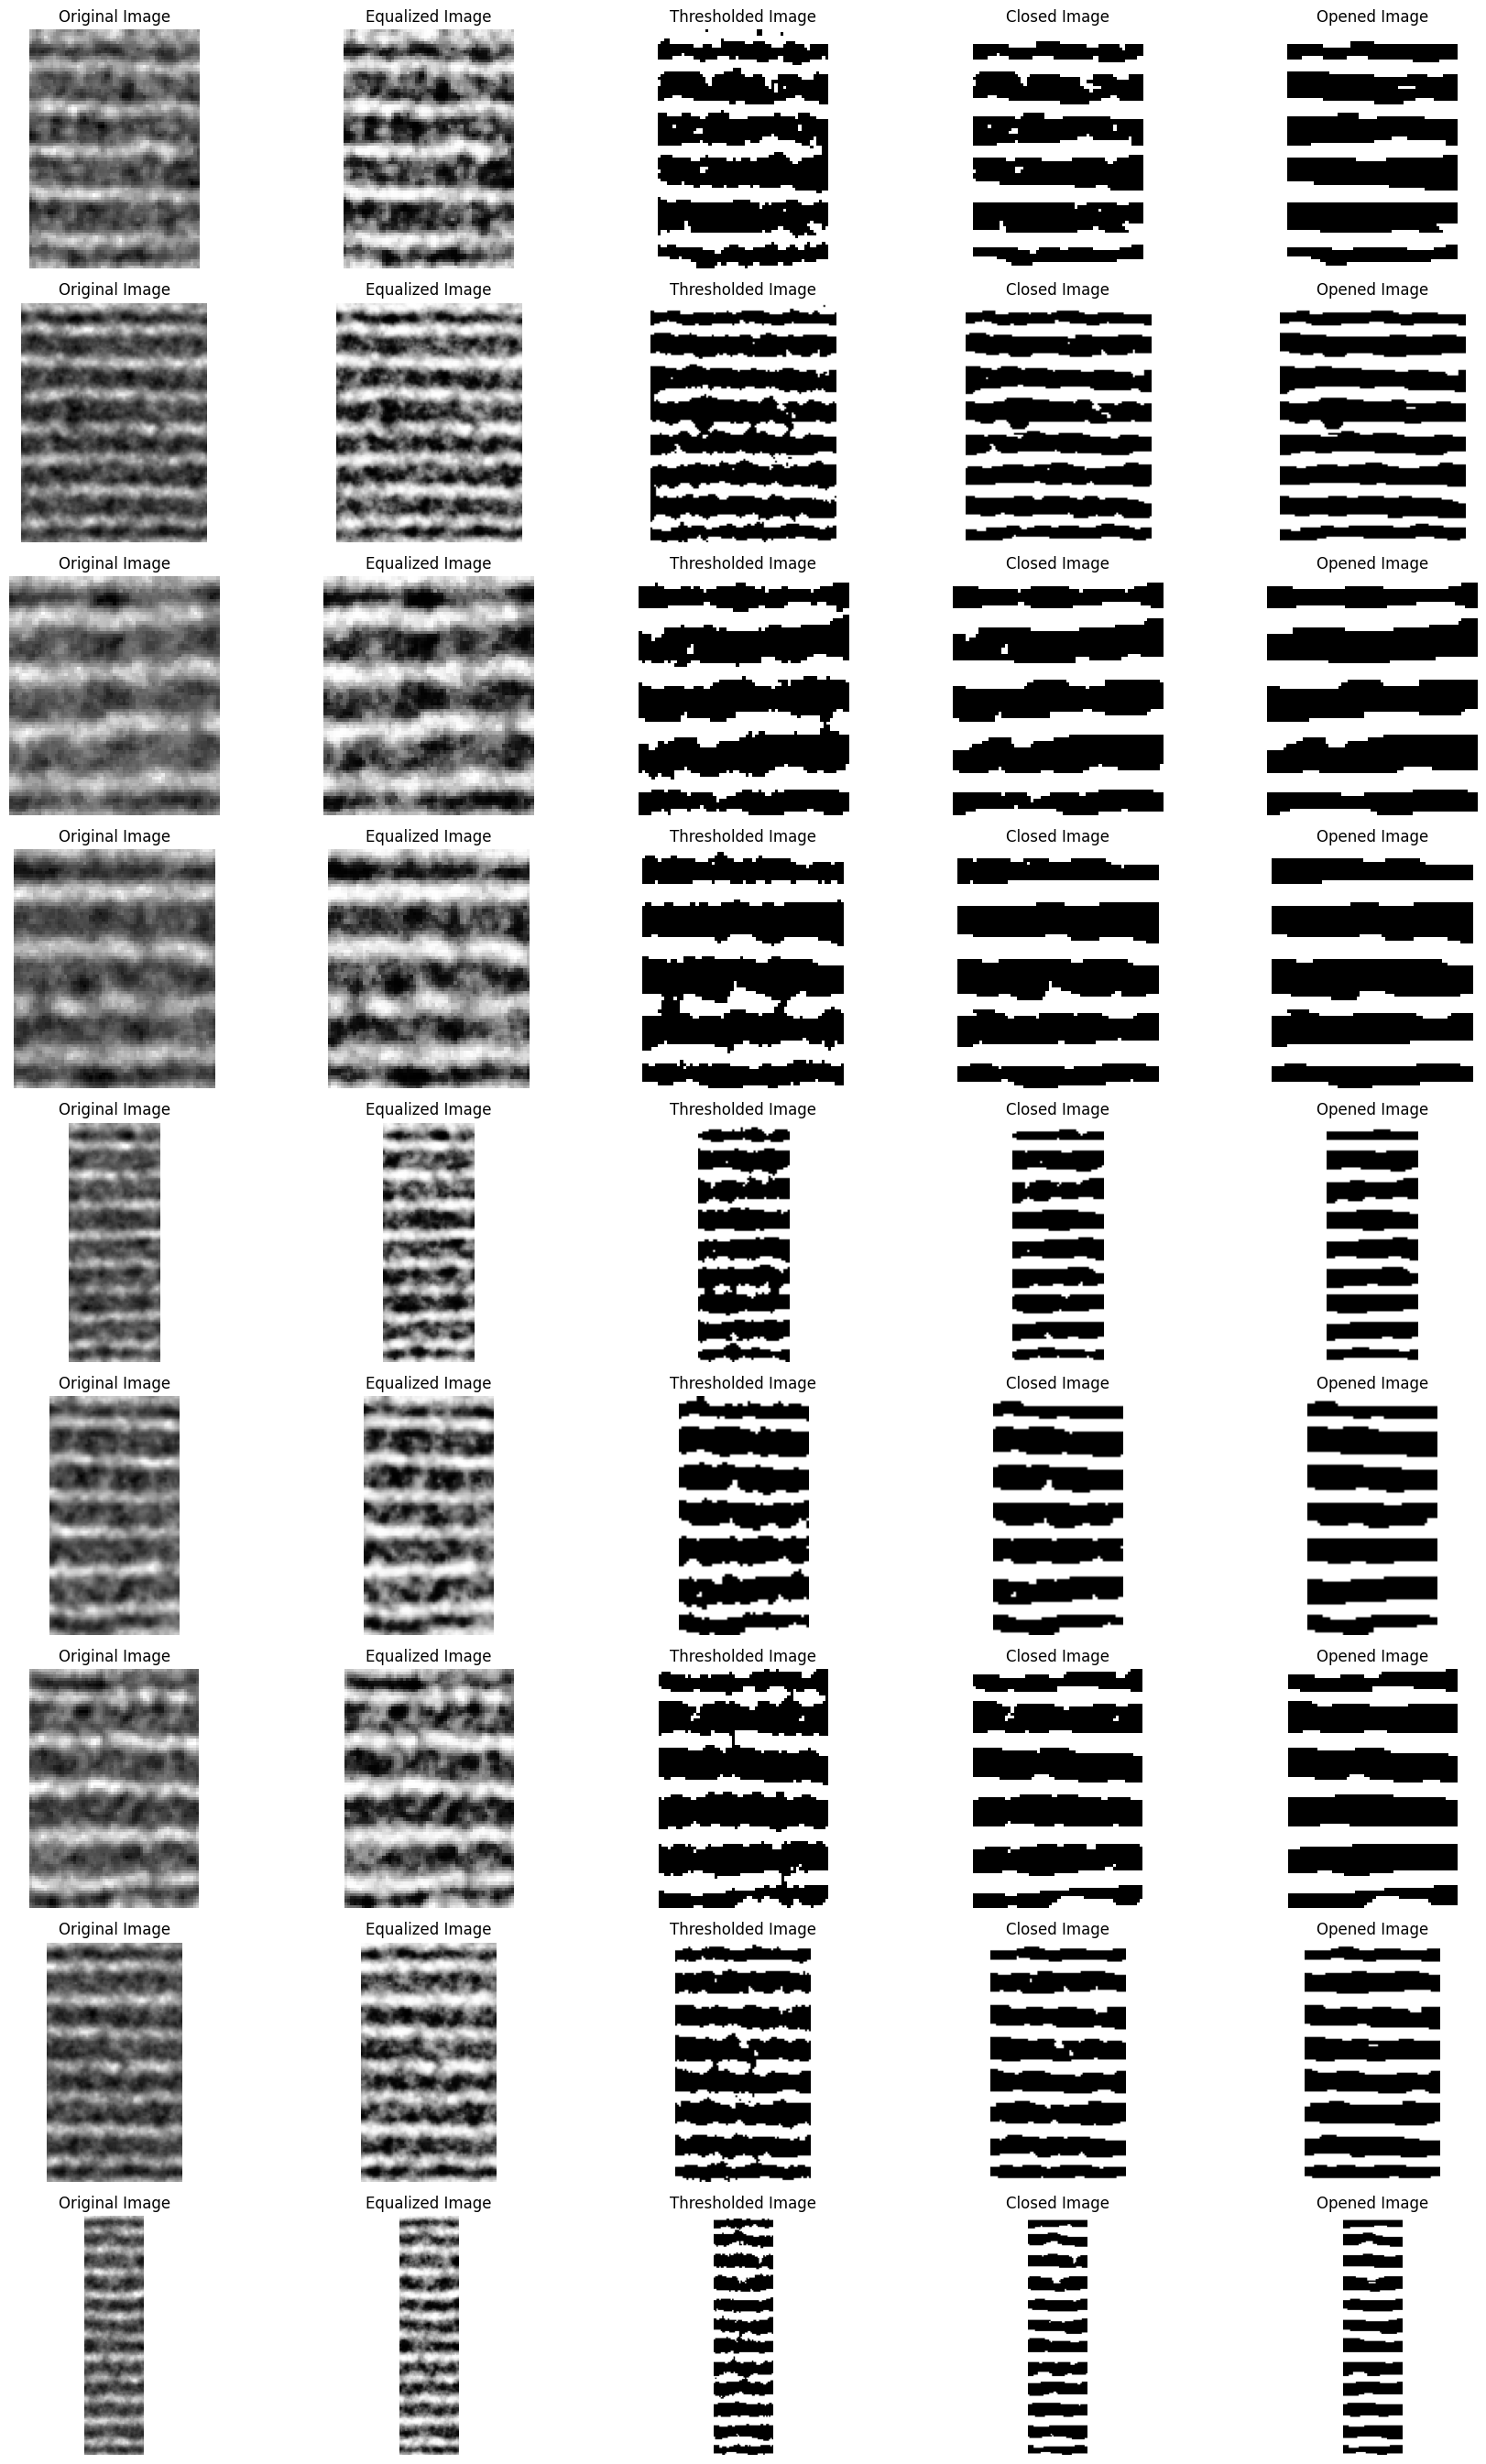

In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

closing_kernel = np.ones((1, 7), np.uint8)
opening_kernel = np.ones((1, 5), np.uint8)
closing_iterations = 1
opening_iterations = 1
th_low = 0
th_high = 130
trial_number = 1
base_path = f"output/trial_{trial_number}/processed_images/"

os.makedirs(base_path, exist_ok=True)


roi_metadata_path = "rois_metadata_bignine.csv"
image_dir = "rois/"

# load the df and print the first few rows
metadata = pandas.read_csv(roi_metadata_path)
print(f"Metadata contains {len(metadata)} images")
print(metadata.head())

# test out a load of the image 0
image = load_gray_image(image_dir + metadata['strip_filename'][0])

# Assuming the function `load_gray_image` and the list `images` are defined elsewhere

def process_test_image(image, th_low=0, th_high=255):
    equalized = cv2.equalizeHist(image)
    #thresholded = cv2.adaptiveThreshold(equalized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,25, 2)
    _, thresholded = cv2.threshold(image, th_low, th_high, cv2.THRESH_OTSU)

    closing1 = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, closing_kernel, iterations=closing_iterations)
    
    opening2 = cv2.morphologyEx(closing1, cv2.MORPH_OPEN, opening_kernel, iterations=opening_iterations)

    return [image, equalized, thresholded, closing1, opening2]

# List to store all processed images
all_images = []

# Process each image and store the results
for image_number in range(9):
    image = load_gray_image(images[image_number])
    processed_images = process_test_image(image, th_low=th_low, th_high=th_high)
    all_images.extend(processed_images)
    
    morphed_image = processed_images[-1]
    
    # threshold the image using a smart thresholding technique
    _, invert_image = cv2.threshold(morphed_image, 0, 255, cv2.THRESH_BINARY_INV)
        
    print(f"Image {image_number} has {np.sum(invert_image == 255)} pixels")

    image_name = f"{os.getcwd()}/{base_path}/{images[image_number].split('\\')[-1].split('rois/')[1]}"
    
    print(f"Saving image to {image_name}")
    
    # does this return a boolean?
    response = cv2.imwrite(image_name, invert_image)
    print(f"imwrite response is {response}")
    
    

# Plot all the images in a single figure with 9 rows and 6 columns
fig, axes = plt.subplots(9, 5, figsize=(18, 27))

for i, ax in enumerate(axes.flat):
    ax.imshow(all_images[i], cmap='gray')
    ax.axis('off')
    if i % 5 == 0:
        ax.set_title("Original Image")
    elif i % 5 == 1:
        ax.set_title("Equalized Image")
    elif i % 5 == 2:
        ax.set_title("Thresholded Image")
    elif i % 5 == 3:
        ax.set_title("Closed Image")
    elif i % 5 == 4:
        ax.set_title("Opened Image")

plt.tight_layout()
plt.savefig("./report/processed_images.png")
plt.show()



# Testing the various thresholding methods

## Otsu thresholding, post processing, and display
## vs Adaptive thresholding, post processing, and display 
## vs Adaptive Gaussian thresholding, post processing, and display


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

closing_kernel = np.ones((1, 7), np.uint8)
opening_kernel = np.ones((1, 5), np.uint8)
closing_iterations = 1
opening_iterations = 1
th_low = 0
th_high = 130
trial_number = 1
base_path = f"output/trial_{trial_number}/processed_images/"
roi_metadata_path = "rois_metadata_bignine.csv"
image_dir = "rois/"

os.makedirs(base_path, exist_ok=True)

# load the df and print the first few rows
metadata = pandas.read_csv(roi_metadata_path)
print(f"Metadata contains {len(metadata)} images")
print(metadata.head())

# test out a load of the image 0
image = load_gray_image(image_dir + metadata['strip_filename'][0])

def load_images(image_path):
    all_images = []
    
    for image_number in range(9):
        image = load_gray_image(images[image_number])
        all_images.extend(image)
    
    return all_images

def equalize_image(image, clip_low=100, clip_high=255):
    equalized = cv2.equalizeHist(image)
    equalized = np.clip(equalized, clip_low, clip_high)
    return equalized

def gauss_blur(image, ksize=(5, 5), sigmaX=0):
    return cv2.GaussianBlur(image, ksize, sigmaX)

def morphological_filter(image, th_low=0, th_high=255):
    closing1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, closing_kernel, iterations=closing_iterations)
    opening2 = cv2.morphologyEx(closing1, cv2.MORPH_OPEN, opening_kernel, iterations=opening_iterations)
    return opening2

## Otsu thresholding, post processing, and display
def otsu_threshold(image, th_low=0, th_high=255):
    _, thresholded = cv2.threshold(image, th_low, th_high, cv2.THRESH_OTSU)
    return thresholded

def adaptive_threshold(image, th_low=0, th_high=255):
    thresholded = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,25, 2)
    return thresholded

def adaptive_gaussian_threshold(image, th_low=0, th_high=255):
    thresholded = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,25, 2)
    return thresholded

def add_color_overlay_to_lumen(image, overlay, alpha=0.3, color=(0, 255, 0)):
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Create the overlay_mask, where the overlay is color and everything else is black
    overlay_mask = np.zeros_like(image)
    overlay_mask[overlay == 255] = color   
    
    # add the overlay to the image
    cv2.addWeighted(overlay_mask, alpha, image, 1 - alpha, 0, image)
    
    print(f"image shape: {image.shape}")
    
    # return the image with the overlay
    return image


def add_membrane_overlay(image, overlay, color=(0, 0, 0)):
    """
    Show the original grayscale image wherever the overlay is white, and color (black) wherever the overlay is black.

    Args:
    - image: Grayscale input image (2D array).
    - overlay: Binary mask (2D array, same size as image).
    - color: Tuple representing the color to display where the overlay is black.

    Returns:
    - Image with the mask applied.
    """
    # Ensure the input image is grayscale and convert to BGR
    if len(image.shape) == 2:  # Check if image is grayscale
        image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
        image_bgr = image  # Already in BGR format

    # Create a mask for the areas to be blacked out (where overlay is 0)
    mask_inv = cv2.bitwise_not(overlay)

    # Convert the binary mask to a 3-channel BGR format
    mask_inv_bgr = cv2.cvtColor(mask_inv, cv2.COLOR_GRAY2BGR)

    # Create an image with the color (black by default) in areas where the overlay is black
    color_image = np.full_like(image_bgr, color, dtype=np.uint8)

    # Use the mask to combine the original image and the color image
    result = cv2.bitwise_and(image_bgr, mask_inv_bgr) + cv2.bitwise_and(color_image, cv2.cvtColor(overlay, cv2.COLOR_GRAY2BGR))

    return result

def process_image(image, method, equalize=True, blur=True, strip:str):
    if equalize:
        image = equalize_image(image, clip_low=0, clip_high=255)
    if blur:
        image = gauss_blur(image, ksize=(5, 5), sigmaX=0)
    if method == "otsu":
        thresholded = otsu_threshold(image)
    elif method == "adaptive":
        thresholded = adaptive_threshold(image)
    elif method == "adaptive_gaussian":
        thresholded = adaptive_gaussian_threshold(image)
    else:
        raise ValueError(f"Method {method} not recognized")

    morphed = morphological_filter(thresholded)
    overlayed = add_membrane_overlay(image, morphed)
    
    return {"method": method,
            "blur": blur,
            "equalize": equalize,
            "strip": strip,
            "image": image, "thresholded": thresholded, "morphed": morphed, "overlayed": overlayed}
    
        
def get_raw_images(metadata_path, image_dir):
    
    metadata = pandas.read_csv(metadata_path)
    strip_filenames = metadata['strip_filename'].tolist()
    images = [image_dir + strip_filename for strip_filename in strip_filenames]
    
    return images


In [ ]:
closing_kernel = np.ones((1, 7), np.uint8)
opening_kernel = np.ones((1, 5), np.uint8)
closing_iterations = 1
opening_iterations = 1
th_low = 0
th_high = 130
trial_number = 1
base_path = f"output/trial_{trial_number}/processed_images/"

os.makedirs(base_path, exist_ok=True)

def get_filename(base_path, suptitle, strip: str):
    ends_with_slash = lambda path: path if path.endswith("/") else path + "/"

    return f"{ends_with_slash(base_path)}{suptitle.replace(' ', '_').replace(',', '')}_strip_{strip}.png"

# function to take blur and non blur and create a plot of them
def plot_images(image_dict:dict, titles=None):
    if titles is None:
        titles = ["Original","Thresholded", "Morphed", "Overlayed"]
    suptitle = f"{image_dict['method']} thresholding, {'blurred' if image_dict['blur'] else 'not blurred'}, {'equalized' if image_dict['equalize'] else 'not equalized'}"
    images = [image_dict["image"], image_dict["thresholded"], image_dict["morphed"], image_dict["overlayed"]]
    fig, axes = plt.subplots(1, 4, figsize=(12, 5.5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
        ax.set_title(titles[i])
    plt.tight_layout()
    plt.suptitle(suptitle, fontsize=16)
    
    filename = get_filename(base_path, suptitle, image_dict["strip"])
    print(f"Saving image to {filename}")
    
    plt.show()
    
    
# Case 1: gaussian blur, otsu thresholding, morphological filtering
# case 2: no blur, otsu thresholding, morphological filtering
# Case 3: gaussian blur, adaptive thresholding, morphological filtering
# Case 4: no blur, adaptive thresholding, morphological filtering
# Case 5: gaussian blur, adaptive gaussian thresholding, morphological filtering
# Case 6: no blur, adaptive gaussian thresholding, morphological filtering

titles = ["Original","Thresholded", "Morphed", "Isolated Membrane"]

plot_images(process_image(image, "otsu", blur=True, equalize=True), titles=titles)
plot_images(process_image(image, "otsu", blur=False, equalize=True), titles=titles)
plot_images(process_image(image, "otsu", blur=True, equalize=False), titles=titles)
plot_images(process_image(image, "otsu", blur=False, equalize=False), titles=titles)

plot_images(process_image(image, "adaptive", blur=True, equalize=True), titles=titles)
plot_images(process_image(image, "adaptive", blur=False, equalize=True), titles=titles)
plot_images(process_image(image, "adaptive", blur=True, equalize=False), titles=titles)
plot_images(process_image(image, "adaptive", blur=False, equalize=False), titles=titles)

plot_images(process_image(image, "adaptive_gaussian", blur=True, equalize=True), titles=titles)
plot_images(process_image(image, "adaptive_gaussian", blur=False, equalize=True), titles=titles)
plot_images(process_image(image, "adaptive_gaussian", blur=True, equalize=False), titles=titles)
plot_images(process_image(image, "adaptive_gaussian", blur=False, equalize=False), titles=titles)


In [ ]:
from itertools import product
 
def get_isolated_membrane(image, method, blur=True, equalize=True):
    processed = process_image(image, method, blur=blur, equalize=equalize)
    return processed["overlayed"]

# get just the isolated membrane for combinations of these factors:
methods = ["otsu", "adaptive", "adaptive_gaussian"]
equalizes = [False, True]
blurs = [False, True]


combinations = product(methods, blurs, equalizes)

# plot them all together in one image so we can compare them. 
# make sure each has a title so we know what we are looking at
# the first image is the original image, and will be the only image in row 1

combo_images = []

for method, blur, equalize in combinations:

    title = f"{method}, {'blurred' if blur else 'not blurred'}, {'equalized' if equalize else 'not equalized'}"
    isolated_membrane = get_isolated_membrane(image, method, blur=blur, equalize=equalize)
    
    combo_images.append((title, isolated_membrane))

# plot only the original image
plt.figure(figsize=(18, 18))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Original Image")
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(18, 12))


In [ ]:
import rando

# I have 9 images that will be processed. Each will result in a row of 6 images.


for image_number in range(9):

    image = load_gray_image(images[image_number])
    equalized = equalize_image(image, clip_low=0, clip_high=100)
    thresholded = threshold_image(equalized, threshold_type=cv2.THRESH_BINARY, block_size=15, constant=2)
    thresholded = cv2.bitwise_not(thresholded)

    # create a custom kernel that is a line with a wider horizontal component, to detect the horizontal lines in the image
    kernel = numpy.ones((1, 3), numpy.uint8)

    # remove small white spots in the image
    closing1 = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel, iterations=1)
    opening = cv2.morphologyEx(closing1, cv2.MORPH_OPEN, kernel, iterations=1)
    closing2 = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

    # plot the raw image, the thresholded image, and the opened image
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 6, 1)
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.title("Original Image")

    plt.subplot(1, 6, 2)
    plt.imshow(equalized, cmap="gray")
    plt.axis("off")
    plt.title("Equalized Image")

    plt.subplot(1, 6, 3)
    plt.imshow(thresholded, cmap="gray")
    plt.axis("off")
    plt.title("Thresholded Image")

    plt.subplot(1, 6, 4)
    plt.imshow(closing1, cmap="gray")
    plt.axis("off")
    plt.title("Closed Image 1")

    plt.subplot(1, 6, 5)
    plt.imshow(opening, cmap="gray")
    plt.axis("off")
    plt.title("Opened Image")

    plt.subplot(1, 6, 6)
    plt.imshow(closing2, cmap="gray")
    plt.axis("off")
    plt.title("Closed Image 2")

## Inverted, open, close, open

In [ ]:
import random

# choose a random image
# random.seed(0)
# image_number = random.randint(0, len(images) - 1)
# print(f"Image number: {image_number}")
image_number = 3

image = load_gray_image(images[image_number])
equalized = equalize_image(image, clip_low=0, clip_high=100) # gets rid of the background, the lighter parts of the image
thresholded = threshold_image(equalized, threshold_type=cv2.THRESH_BINARY, block_size=15, constant=2)

# invert so that the membranes are white, and the background is black
thresholded = cv2.bitwise_not(thresholded)

# create a custom kernel that is a line with a wider horizontal component, to detect the horizontal lines in the image

# remove small white spots in the image
opening_kernel = numpy.ones((2, 3), numpy.uint8)
opening1 = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, opening_kernel, iterations=2) # opens the image, removes small white spots

closing_kernel = numpy.ones((1, 3), numpy.uint8)
closing1 = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, closing_kernel, iterations=1) # What is this doing? It is closing the image, removing small black spots

# plot the raw image, the thresholded image, and the opened image
plt.figure(figsize=(15, 10))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 5, 2)
plt.imshow(equalized, cmap="gray")
plt.axis("off")
plt.title("Equalized Image")

plt.subplot(1, 5, 3)
plt.imshow(thresholded, cmap="gray")
plt.axis("off")
plt.title("Thresholded Image")

plt.subplot(1, 5, 4)
plt.imshow(opening1, cmap="gray")
plt.axis("off")
plt.title("Opened Image")

plt.subplot(1, 5, 5)
plt.imshow(closing1, cmap="gray")
plt.axis("off")
plt.title("Closed Image 1")



## now we need to create contours for the objects, and filter out the small ones


In [ ]:

for image_number in range(9):

    image = load_gray_image(images[image_number])
    
    
    image = load_gray_image(images[image_number])
    equalized = equalize_image(image, clip_low=0, clip_high=100)
    thresholded = threshold_image(equalized, threshold_type=cv2.THRESH_BINARY, block_size=15, constant=2)
    thresholded = cv2.bitwise_not(thresholded)

    # create a custom kernel that is a line with a wider horizontal component, to detect the horizontal lines in the image
    kernel = numpy.ones((1, 3), numpy.uint8)

    # remove small white spots in the image
    closing1 = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel, iterations=1)
    opening = cv2.morphologyEx(closing1, cv2.MORPH_OPEN, kernel, iterations=1)
    closing2 = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

    # find the contours in the image
    contours, _ = cv2.findContours(closing2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # filter by area
    min_area = 10
    max_area = 1e100
    filtered_contours = [c for c in contours if min_area < cv2.contourArea(c) < max_area]

    # draw the contours on the image
    contour_image = numpy.zeros_like(image)
    cv2.drawContours(contour_image, filtered_contours, -1, (255, 255, 255), 1)

    # create rgb copy of original image
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # create a red contour image
    contour_image = numpy.zeros_like(rgb_image)

    cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 1)

    # create an image with the RGB image and the contour image overlaid
    overlay = cv2.addWeighted(rgb_image, 0.5, contour_image, 0.5, 0)

    # plot the rgb_image, the contour image, and then the overlay
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 4, 1)
    plt.imshow(rgb_image)
    plt.axis("off")
    plt.title("Image")

    plt.subplot(1, 4, 2)
    plt.imshow(closing2, cmap="gray")
    plt.axis("off")
    plt.title("Closing Image")

    plt.subplot(1, 4, 3)
    plt.imshow(contour_image)
    plt.axis("off")
    plt.title("Contour Image")

    plt.subplot(1, 4, 4)
    plt.imshow(overlay)
    plt.axis("off")
    plt.title("Overlay Image")

    plt.savefig(f"output/contours_{image_number}.png")

## Function to do all the things


In [ ]:
def load_gray_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def equalize_image(image, clip_low=100, clip_high=255):
    equalized = cv2.equalizeHist(image)
    equalized = numpy.clip(equalized, clip_low, clip_high)
    return equalized

def process_image_strip(image_path: str, metadata: dict) -> dict:
    # load the image
    image = load_gray_image(image_path)

    print(f"Processing {image_path}")
    # equalize the image
    equalized = equalize_image(image, metadata["clip_low"], metadata["clip_high"])


    # threshold the image
    if metadata["threshold_type"] == "otsu":
        _, thresholded = cv2.threshold(image, metadata["th_min_value"], metadata["th_max_value"], cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        thresholded = cv2.adaptiveThreshold(equalized, metadata["th_max_value"], cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, metadata["th_block_size"], metadata["th_constant"])
        
    # create a custom kernel that is a line with a wider horizontal component, to detect the horizontal lines in the image
    kernel = numpy.ones((metadata["k0"], metadata["k1"]), numpy.uint8)

    # remove small white spots in the image
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=metadata["opening_iterations"])
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=metadata["closing_iterations"])

    # find the contours in the image
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # filter by area
    filtered_contours = [c for c in contours if metadata["min_area"] < cv2.contourArea(c) <  metadata["max_area"]]

    return {"image": image, "equalized": equalized, "thresholded": thresholded, "closing": closing, "filtered_contours": filtered_contours, "raw_image": cv2.imread(image_path)}


In [ ]:
trial_number = 0
base_filepath =  f"output/trial_{trial_number}"
equalized_filepath = f"{base_filepath}/equalized"
contours_filepath =  f"{base_filepath}/contours"
comparison_filepath =  f"{base_filepath}/comparison"
overlay_filepath =  f"{base_filepath}/overlay"
thresholded_filepath =  f"{base_filepath}/thresholded"
strips_filepath = f"roi_images"
output_strips_filepath = f"{base_filepath}/strips"
images = glob.glob(f"{strips_filepath}/*.png")

contour_thickness = -1 # -1 to have the contour filled

# ensure that the directories exist
os.makedirs(contours_filepath, exist_ok=True)
os.makedirs(comparison_filepath, exist_ok=True)
os.makedirs(overlay_filepath, exist_ok=True)
os.makedirs(thresholded_filepath, exist_ok=True)
os.makedirs(output_strips_filepath, exist_ok=True)
os.makedirs(equalized_filepath, exist_ok=True)

# load the roi_metadata 
metadata = pandas.read_csv("roi_metadata.csv")

# save it to the output directory
metadata.to_csv(f"{base_filepath}/roi_metadata.csv", index=False)

# - image name
# - equalize histogram parameters, clip_low, clip_high
# - Otsu thresholding parameters
# - contour min and max area used for thresholding
# # - opening and closing kernel size and iterations
files_str = ", ".join(images)
meta_df = {"images": files_str,
           "clip_low": 0, 
           "clip_high": 130, 
           "min_area": 10, 
           "max_area": 1e100, 
           "k0": 1, # kernel dimensions y
           "k1": 3, # kernel dimensions x
           "opening_iterations": 1, 
           "closing_iterations": 3, 
           "threshold_type": "otsu",
           "th_min_value": 0,
            "th_max_value": 255,
           "th_block_size": 15,
           "th_constant": 2,}

# write out the metadata as a json file
import json
with open(f"{base_filepath}/processing_metadata.json", "w") as f:
    f.write(json.dumps(meta_df, indent=4))


for filename in images[:10]:
    print(filename)

    # save to output strips
    cv2.imwrite(f"{output_strips_filepath}/{os.path.basename(filename)}", cv2.imread(filename))
    
    processed = process_image_strip(filename, meta_df)
    
    print(processed["closing"].shape)
    print(processed["image"].shape)
    
    image_name = os.path.basename(filename)
    cv2.imwrite(f"{thresholded_filepath}/{image_name}", processed["thresholded"])

    image = processed["image"]
    cv2.imwrite(f"{equalized_filepath}/{image_name}", image)

    filtered_contours = processed["filtered_contours"]
    raw_image = processed["raw_image"]    
    raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

    # draw the contours on the image
    contour_image = numpy.zeros_like(image)
    cv2.drawContours(contour_image, filtered_contours, -1, (255, 255, 255), contour_thickness)

    # save the contour image
    cv2.imwrite(f"{contours_filepath}/{image_name}", contour_image)

    # create rgb copy of original image
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # # create a red contour image
    contour_image = numpy.zeros_like(rgb_image)

    cv2.drawContours(contour_image, filtered_contours, -1, (0, 0, 255), contour_thickness)

    # create an image with the RGB image and the contour image overlaid
    overlay = cv2.addWeighted(rgb_image, 0.5, contour_image, 0.5, 0)
    
    cv2.imwrite(f"{overlay_filepath}/{image_name}", overlay)
    
    # plot the rgb_image, the contour image, and then the overlay. The figsize should be wider than it is tall
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 4, 1)
    plt.imshow(raw_image)
    plt.axis("off")
    plt.title("Raw Image")
    
    plt.subplot(1, 4, 2)
    plt.imshow(rgb_image)
    plt.axis("off")
    plt.title("Image")

    plt.subplot(1, 4, 3)
    plt.imshow(contour_image)
    plt.axis("off")
    plt.title("Contour Image")

    plt.subplot(1, 4, 4)
    plt.imshow(overlay)
    plt.axis("off")
    plt.title("Overlay Image")

    plt.savefig(f"{comparison_filepath}/{image_name}")
    
